# SYSTEM OF INTEREST (SOI) 
<ol><li>DATA PREPARATION</li>
    <li>LEARNING MODEL</li>
    <li>EVALUATION AND DEPLOYMENT</li></ol>

## DATA PREPARATION SUBSYSTEM

<h3><em>Data preparation used in the base paper is mentioned below:</em></h3>
<ul><li><p>combined two main and common weather conditions datasets, DAWM2020 dataset and MCWCD2018,<br> to end up with a dataset composed of 1656 image samples that are grouped into six classes for weather conditions:<br> cloudy (300 images), rainy (215 images), snowy (204 images), sandy (319 images), shine (253 images), and sunrise (365 images)</p></li>
<li><p>Image datasets are collected, combined, and labeled into six class labels by means of six folders, each of which holds the name of one weather class</p></li>
<li><p>Initially, the image-type of all images is unified to JPG image extension, and then the image-resize operation is applied <br> over all JPG images
in which the sizes of all images are converted to 3D matrices (RGB images) with image
dimensions of 224 ×224 ×3.</p></li>
<li><p>applying randomized augmentation operations on the dataset. The augmentation process configures <br>a set of preprocessing
options such as resizing, cropping, rotation, reflection, invariant distortions, and others.</p></li>
<li><p>images are shuffled randomly.</p></li></ul>

<h3><em>Extra techniques used:</em></h3>
<ul><li><p>Categorical labels are converted into numerical format for better compatibality for ML and DL algos befor feeding it into model.</p></li>
<li><p>Normalization to ensure the data distribution is well-suited for the model's initial weights and activations and helps to converge fast.</p></li>
<li><p>Data balancing, as the dataset is imbalanced.</p></li><ul>

In [1]:
import matplotlib.pyplot as plt
from torchvision import transforms
import random
import shutil
from PIL import Image
import numpy as np
import os
import cv2
import skimage.io as io

In [2]:
folders = list()
path = "/kaggle/input/ds-dataset/datasets"
for folder in os.listdir(path):
    folder = os.path.join(path, str(folder))
    folders.append(os.path.join(*folder.split("/")[3:]))
print(folders)
for folder in folders:    
    os.makedirs("/kaggle/working/"+folder, exist_ok=True)
    

['ds-dataset/datasets/Cloudy', 'ds-dataset/datasets/Snow', 'ds-dataset/datasets/Sand', 'ds-dataset/datasets/Sunrise', 'ds-dataset/datasets/Fog', 'ds-dataset/datasets/Shine', 'ds-dataset/datasets/Rainy']


In [3]:
def transform_n_create(image_folder: str, output_folder:str) -> None:
    """
    This function will take in image folder path as input
    and stores the transformed images into differnt folder
    
    Here Normalization is not done because it hinders the image content
    """
    transformations = transforms.Compose([
    transforms.Resize((224, 224)), # transforming the dimensions 
    transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # normalizing the images
        ])
    
    for folder in os.listdir(image_folder):
        print(folder)
        ifolder = os.path.join(image_folder, str(folder))
        for files in os.listdir(ifolder):
            ofiles = os.path.join(output_folder, str(folder), str(files))
            ifiles = os.path.join(ifolder, str(files))
            image = Image.open(ifiles)
            # drop images which doesn't have rgb channels 
            if len(image.getbands()) == 3:
                resized_img = transformations(image)
                resized_img = transforms.ToPILImage()(resized_img)
                resized_img.save(ofiles)

transform_n_create("/kaggle/input/ds-dataset/datasets/", "/kaggle/working/ds-dataset/datasets/")

Cloudy
Snow
Sand
Sunrise
Fog
Shine
Rainy


In [4]:
def augmentation_h(image_folder: str, output_folder:str) -> None:
    """
    This function will take in image folder path as input
    and stores the augmented images into differnt folder
    
    Here Normalization is not done because it hinders the image content
    """
    data_transforms = transforms.Compose([
    transforms.Resize((300, 300)),  # Resize the image to 256x256
    transforms.RandomRotation(degrees=20),  # Randomly rotate the image within +/- 15 degrees
    transforms.CenterCrop(224),  # Randomly crop a 224x224 region from the resized image
#     transforms.RandomHorizontalFlip(p=1.0),  # Randomly flip the image horizontally
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Adjust brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the tensor
    ])
    
    for folder in os.listdir(image_folder):
        print(folder)
        ifolder = os.path.join(image_folder, str(folder))
        for files in os.listdir(ifolder):
            ofiles = os.path.join(output_folder, str(folder), str(files))
            ifiles = os.path.join(ifolder, str(files))
            image = Image.open(ifiles)
            # drop images which doesn't have rgb channels 
            if len(image.getbands()) == 3:
                resized_img = data_transforms(image)
                resized_img = transforms.ToPILImage()(resized_img)
                temp = ofiles.split(".")
                newfile = temp[0] + "h." + temp[1]
                resized_img.save(newfile)

augmentation_h("/kaggle/input/ds-dataset/datasets/", "/kaggle/working/ds-dataset/datasets/")

Cloudy
Snow
Sand
Sunrise
Fog
Shine
Rainy


In [5]:
def augmentation(image_folder: str, output_folder:str) -> None:
    """
    This function will take in image folder path as input
    and stores the augmented images into differnt folder
    
    Here Normalization is not done because it hinders the image content
    """
    data_transforms = transforms.Compose([
    transforms.Resize((300, 300)),  # Resize the image to 256x256
    transforms.RandomRotation(degrees=15),  # Randomly rotate the image within +/- 15 degrees
    transforms.CenterCrop(224),  # Randomly crop a 224x224 region from the resized image
    transforms.RandomHorizontalFlip(p=1.0),  # Randomly flip the image horizontally
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Adjust brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the tensor
    ])
    
    for folder in os.listdir(image_folder):
        print(folder)
        ifolder = os.path.join(image_folder, str(folder))
        for files in os.listdir(ifolder):
            ofiles = os.path.join(output_folder, str(folder), str(files))
            ifiles = os.path.join(ifolder, str(files))
            image = Image.open(ifiles)
            # drop images which doesn't have rgb channels 
            if len(image.getbands()) == 3:
                resized_img = data_transforms(image)
                resized_img = transforms.ToPILImage()(resized_img)
                temp = ofiles.split(".")
                newfile = temp[0] + "a." + temp[1]
                resized_img.save(newfile)

augmentation("/kaggle/input/ds-dataset/datasets/", "/kaggle/working/ds-dataset/datasets/")

Cloudy
Snow
Sand
Sunrise
Fog
Shine
Rainy


In [6]:
# check for shape changes in dataset
img_default = cv2.imread("/kaggle/input/ds-dataset/datasets/Cloudy/cloudy116.jpg")
img_augmented = cv2.imread("/kaggle/working/ds-dataset/datasets/Cloudy/cloudy116a.jpg")

print(f"Shape of normal image {img_default.shape}")
print(f"Shape of augmented image {img_augmented.shape}")

Shape of normal image (1200, 1600, 3)
Shape of augmented image (224, 224, 3)


In [7]:
# to create train,test and validation sets 
path = "/kaggle/working/ds-dataset/datasets"
for fold_type in ["train_data", "test_data", "val_data"]:
    folders = list()
    for folder in os.listdir(path):
        folder = os.path.join(path, str(folder))
        folder = folder.split("/")[3:]
        folders.append(os.path.join(folder[0], fold_type, folder[2]))
    print(folders)
    for folder in folders:    
        os.makedirs("/kaggle/working/"+folder, exist_ok=True)

['ds-dataset/train_data/Snow', 'ds-dataset/train_data/Sunrise', 'ds-dataset/train_data/Rainy', 'ds-dataset/train_data/Sand', 'ds-dataset/train_data/Shine', 'ds-dataset/train_data/Fog', 'ds-dataset/train_data/Cloudy']
['ds-dataset/test_data/Snow', 'ds-dataset/test_data/Sunrise', 'ds-dataset/test_data/Rainy', 'ds-dataset/test_data/Sand', 'ds-dataset/test_data/Shine', 'ds-dataset/test_data/Fog', 'ds-dataset/test_data/Cloudy']
['ds-dataset/val_data/Snow', 'ds-dataset/val_data/Sunrise', 'ds-dataset/val_data/Rainy', 'ds-dataset/val_data/Sand', 'ds-dataset/val_data/Shine', 'ds-dataset/val_data/Fog', 'ds-dataset/val_data/Cloudy']


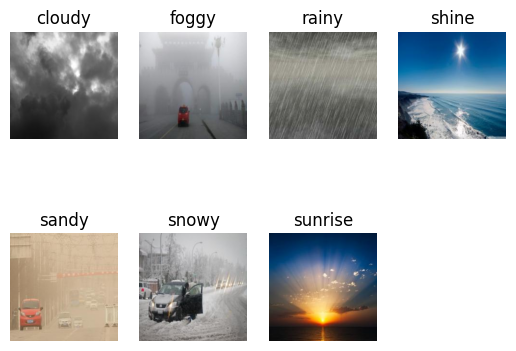

In [8]:
# Image.open("/kaggle/input/ds-dataset/datasets/Cloudy/cloudy1.jpg")
# Image.open("/kaggle/input/ds-dataset/datasets/Fog/foggy-001.jpg")
# Image.open("/kaggle/input/ds-dataset/datasets/Rainy/rain1.jpg")

# plt.figure(figsize=(10,10))
plt.subplot(241)
img1 = plt.imread("/kaggle/working/ds-dataset/datasets/Cloudy/cloudy1.jpg")
plt.axis("off")
plt.title("cloudy")
plt.imshow(img1)

plt.subplot(242)
img1 = plt.imread("/kaggle/working/ds-dataset/datasets/Fog/foggy-001.jpg")
plt.axis("off")
plt.title("foggy")
plt.imshow(img1)
# plt.show()

plt.subplot(243)
img1 = plt.imread("/kaggle/working/ds-dataset/datasets/Rainy/rain1.jpg")
plt.axis("off")
plt.title("rainy")
plt.imshow(img1)
# plt.show()

plt.subplot(244)
img1 = plt.imread("/kaggle/working/ds-dataset/datasets/Shine/shine1.jpg")
plt.axis("off")
plt.title("shine")
plt.imshow(img1)
# plt.show()

plt.subplot(245)
img1 = plt.imread("/kaggle/working/ds-dataset/datasets/Sand/dusttornado-001.jpg")
plt.axis("off")
plt.title("sandy")
plt.imshow(img1)

# plt.show()

plt.subplot(246)
img1 = plt.imread("/kaggle/working/ds-dataset/datasets/Snow/snow_storm-001.jpg")
plt.axis("off")
plt.title("snowy")
plt.imshow(img1)
# plt.show()

plt.subplot(247)
img1 = plt.imread("/kaggle/working/ds-dataset/datasets/Sunrise/sunrise1(1).jpg")
plt.axis("off")
plt.title("sunrise")
plt.imshow(img1)
plt.show()


In [9]:
# select random images and add it to folders train and test
# select 600 images from each class
train_path = "/kaggle/working/ds-dataset/train_data"
test_path = "/kaggle/working/ds-dataset/test_data"
for folder in os.listdir(path):
    foldpath = os.path.join(path, str(folder))
    comp_files = os.listdir(foldpath)[:600]
#     print(len(comp_files))
    filenames = random.sample(comp_files, int(0.8*len(comp_files)))
    left_files = list(set(comp_files) - set(filenames))
    
    trainpath = os.path.join(train_path, str(folder))
    testpath = os.path.join(test_path, str(folder))
    
    for file in filenames:
        srcpath = os.path.join(foldpath, file)
        shutil.copy(srcpath, trainpath)
    for file in left_files:
        srcpath = os.path.join(foldpath, file)
        shutil.copy(srcpath, testpath)
      
    
train_path = "/kaggle/working/ds-dataset/train_data"
val_path = "/kaggle/working/ds-dataset/val_data"
for folder in os.listdir(train_path):
    foldpath = os.path.join(train_path, str(folder))
    comp_files = os.listdir(foldpath)
#     print(comp_files)
    filenames = random.sample(comp_files, int(0.2*len(comp_files)))
    
    valpath = os.path.join(val_path, str(folder))
    
    for file in filenames:
        srcpath = os.path.join(foldpath, file)
        shutil.move(srcpath, valpath)

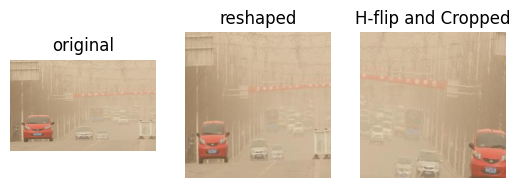

In [10]:
plt.subplot(131)
img = plt.imread("/kaggle/input/ds-dataset/datasets/Sand/dusttornado-001.jpg")
plt.axis("off")
plt.title("original")
plt.imshow(img)

plt.subplot(132)
img = plt.imread("/kaggle/working/ds-dataset/datasets/Sand/dusttornado-001.jpg")
plt.axis("off")
plt.title("reshaped")
plt.imshow(img)

plt.subplot(133)
img = plt.imread("/kaggle/working/ds-dataset/datasets/Sand/dusttornado-001a.jpg")
plt.axis("off")
plt.title("H-flip and Cropped")
plt.imshow(img)

plt.show()

## LEARNING MODEL SUBSYSTEM

<h3><em>Input Layer:</em></h3>
<p>RGB images of dimensions 224x224x3 passed as input for CNNs.</p>

<h3><em>Processing Layer:</em></h3>
<h4><em>Transfer learning on three deep CNNs used in the base paper:</em></h4>
<ul>
    <li><p>SqueezeNet CNN</p></li>
    <li><p> ResNet-50 CNN</p></li>
    <li><p>EfficientNet-b0 CNN</p></li>
</ul>
<p>The model is
fully trained to do classification task A. The knowledge (pretrained parameters)<br> is
stored and transferred to the new model to do classification task B with fine-tuning.</p>

<h3><em>Output Layer:</em></h3>
<p>The output of SqueezeNet (1000) is fully connected with the number
of classes (6), the output of ResNet-50 (2048)<br> is fully connected with the number of
classes (6), and the output of EfficientNet-B0 (1280) is fully connected with the<br> number
of classes (6). The final output will be provided as a SoftMax probability function, and
the maximum<br> probability will be selected to represent the final classification result.
</p>
<!-- ![image.png]("https://drive.usercontent.google.com/download?id=18Lz39CM7Qp7acZe2zq0KQDPhO0Q9jKnY")
<img src="https://drive.usercontent.google.com/download?id=18Lz39CM7Qp7acZe2zq0KQDPhO0Q9jKnY"> -->

<h3><em>Changes:</em></h3>
<p>
    Training the model for 7 classes which include,
    <ul>
        <li>Cloudy
        <li>Snow
        <li>Sand
        <li>Sunrise
        <li>Fog
        <li>Shine
        <li>Rainy
    </ul>
<p>

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

2024-03-28 21:05:59.899603: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 21:05:59.899760: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 21:06:00.016280: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [12]:
num_classes = 7

In [13]:
# loading pre-trained efficientnetB0 model , discarding the top layers 
effi_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
# freeze the base model layers 
effi_model.trainable = False

In [15]:
# Add custom layers for classification
x = effi_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(1280, activation="relu")(x)
predictions = Dense(num_classes, activation="softmax")(x)

In [16]:
# create the model
model = Model(inputs=effi_model.input, outputs=predictions)

In [17]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

In [18]:
# display summary 
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 5,698,218 (21.74 MB)

 Trainable params: 1,648,647 (6.29 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

<p><strong>NOTE :</strong> The tensorflow data generator will convert the categorical labels into numerical labels, so no need of explicit conversion</p>

### USE IMAGE_DATASET_FROM_DIRECOTRY / IMAGE_DATAGENERATOR

```python
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/working/ds-dataset/train_data',
    target_size=(224, 224),  # Adjust for your model's input size
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

validation_generator = validation_datagen.flow_from_directory(
    '/kaggle/working/ds-dataset/val_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = validation_datagen.flow_from_directory(  # Use validation generator for test set as well
    '/kaggle/working/ds-dataset/test_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Don't shuffle the test set
)
```

In [19]:

# convert the files into train, test, and validation sets
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/working/ds-dataset/train_data", image_size=(224, 224),
    batch_size=32
    )
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/working/ds-dataset/test_data", image_size=(224, 224),
    batch_size=32
    )
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/working/ds-dataset/val_data", image_size=(224, 224),
    batch_size=32
    )

Found 2688 files belonging to 7 classes.
Found 840 files belonging to 7 classes.
Found 672 files belonging to 7 classes.


In [20]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=150
)

Epoch 1/150


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 3/84 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.1719 - loss: 1.7521      

I0000 00:00:1711660007.818346      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


84/84 ━━━━━━━━━━━━━━━━━━━━ 43s 117ms/step - accuracy: 0.6599 - loss: 0.8448 - val_accuracy: 0.8929 - val_loss: 0.3161
Epoch 2/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.8916 - loss: 0.2770 - val_accuracy: 0.8988 - val_loss: 0.2777
Epoch 3/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9345 - loss: 0.1773 - val_accuracy: 0.8973 - val_loss: 0.2748
Epoch 4/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9567 - loss: 0.1234 - val_accuracy: 0.8899 - val_loss: 0.2978
Epoch 5/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9554 - loss: 0.1288 - val_accuracy: 0.9033 - val_loss: 0.2658
Epoch 6/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9602 - loss: 0.1102 - val_accuracy: 0.9107 - val_loss: 0.2378
Epoch 7/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9829 - loss: 0.0542 - val_accuracy: 0.9167 - val_loss: 0.2431
Epoch 8/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9843 - loss: 0.0456 - val_accuracy: 0.9211 - va

In [21]:
loss, accuracy = model.evaluate(test_ds)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
# print(f"Test precision: {precision}")
# print(f"Test recall: {recall}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 258ms/step - accuracy: 0.9106 - loss: 0.7485
Test Loss: 0.7315163612365723
Test Accuracy: 0.9166666865348816


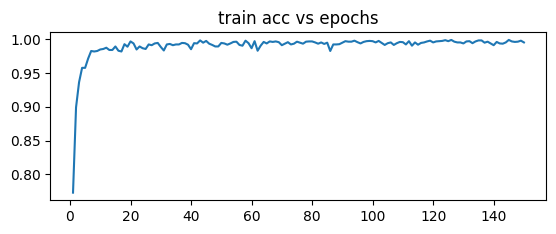

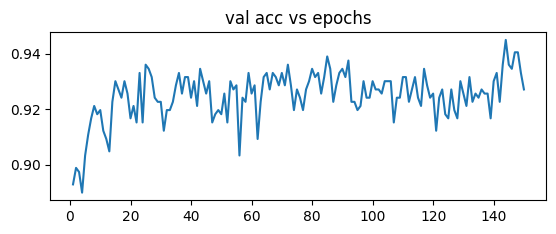

In [22]:
# Access training and validation accuracy for each epoch
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Access other metrics (e.g., loss) if included during compilation
train_loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1,151)
plt.subplot(211)
plt.title("train acc vs epochs")
plt.plot(x, train_acc)
plt.show()
plt.subplot(212)
plt.title("val acc vs epochs")
plt.plot(x, val_acc)
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
class_names = ["Cloudy", "Snow", "Sunrise", "Fog", "Shine", "Rainy", "Sand"]
predictions = model.predict(test_ds)

predicted_classes = np.argmax(predictions, axis=1)
# Get true class labels from the filenames:
true_classes = np.asarray([os.path.basename(os.path.dirname(filename)) for filename in test_ds.file_paths])

class_name_to_index = {name: i for i, name in enumerate(test_ds.class_names)}
true_classes_numeric = [class_name_to_index[name] for name in true_classes]




from sklearn.metrics import accuracy_score

# Get accuracy for each class individually
for i in range(len(test_ds.class_names)):
    class_idx = i
    class_true_labels = true_classes == class_idx
    class_pred_labels = predicted_classes == class_idx
    class_accuracy = accuracy_score(class_true_labels, class_pred_labels)
    # Use true_classes_numeric for confusion matrix calculation
    cm = confusion_matrix(true_classes_numeric, predicted_classes)
    print(f"Accuracy for class '{test_ds.class_names[class_idx]}': {class_accuracy:.4f}")



27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 265ms/step
Accuracy for class 'Cloudy': 0.8512
Accuracy for class 'Fog': 0.8536
Accuracy for class 'Rainy': 0.8750
Accuracy for class 'Sand': 0.8643
Accuracy for class 'Shine': 0.8560
Accuracy for class 'Snow': 0.8452
Accuracy for class 'Sunrise': 0.8548


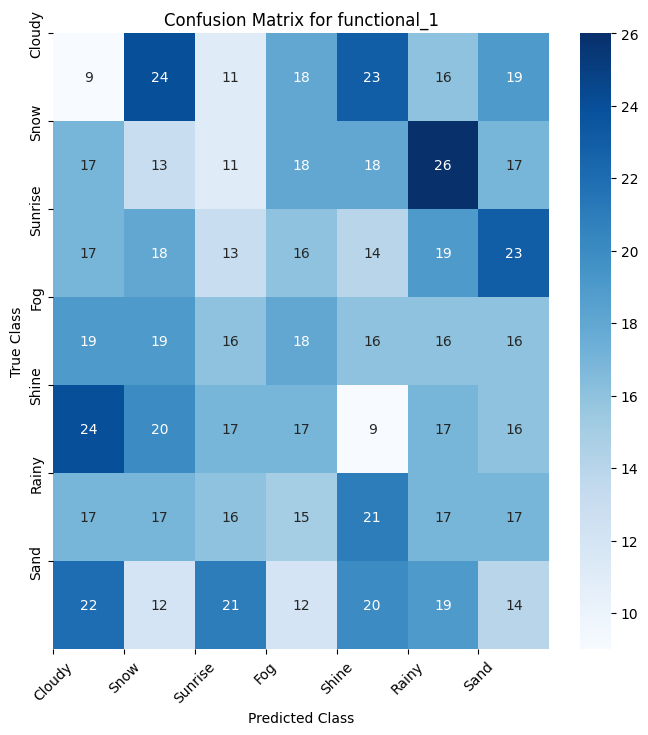

In [25]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')  # Adjust colormap as desired
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45)
plt.yticks(ticks=range(len(class_names)), labels=class_names)
plt.title('Confusion Matrix for ' + model.name)
plt.show()

In [26]:
model.save_weights("/kaggle/working/effi.weights.h5")

### ResNet-50 model

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.efficientnet import preprocess_input

In [28]:
# loading pre-trained efficientnetB0 model , discarding the top layers 
resnet_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
resnet_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [29]:
# Add custom layers for classification
x = resnet_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(2048, activation="relu")(x)
predictions = Dense(num_classes, activation="softmax")(x)

In [30]:
# create the model
model = Model(inputs=resnet_model.input, outputs=predictions)

In [31]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

In [32]:
# display summary 
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 27,798,407 (106.04 MB)

 Trainable params: 4,210,695 (16.06 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

```python
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/working/ds-dataset/train_data',
    target_size=(224, 224),  # Adjust for your model's input size
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

validation_generator = validation_datagen.flow_from_directory(
    '/kaggle/working/ds-dataset/val_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = validation_datagen.flow_from_directory(  # Use validation generator for test set as well
    '/kaggle/working/ds-dataset/test_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Don't shuffle the test set
)
```

In [33]:

# convert the files into train, test, and validation sets
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/working/ds-dataset/train_data", image_size=(224, 224),
    batch_size=32
    )
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/working/ds-dataset/test_data", image_size=(224, 224),
    batch_size=32
    )
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/working/ds-dataset/val_data", image_size=(224, 224),
    batch_size=32
    )

Found 2688 files belonging to 7 classes.
Found 840 files belonging to 7 classes.
Found 672 files belonging to 7 classes.


In [34]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=150
)

Epoch 1/150


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


84/84 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - accuracy: 0.6782 - loss: 1.2826 - val_accuracy: 0.8914 - val_loss: 0.3215
Epoch 2/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.9152 - loss: 0.2160 - val_accuracy: 0.9062 - val_loss: 0.2599
Epoch 3/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.9581 - loss: 0.1198 - val_accuracy: 0.9018 - val_loss: 0.2799
Epoch 4/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.9721 - loss: 0.0868 - val_accuracy: 0.8958 - val_loss: 0.2988
Epoch 5/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.9766 - loss: 0.0736 - val_accuracy: 0.8690 - val_loss: 0.3880
Epoch 6/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.9761 - loss: 0.0679 - val_accuracy: 0.8824 - val_loss: 0.3604
Epoch 7/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.9881 - loss: 0.0410 - val_accuracy: 0.9033 - val_loss: 0.3447
Epoch 8/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.9889 - loss: 0.0319 - val_accuracy: 0.8884 - val

In [35]:
loss, accuracy = model.evaluate(test_ds)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.9200 - loss: 0.9937
Test Loss: 0.7862376570701599
Test Accuracy: 0.9309523701667786


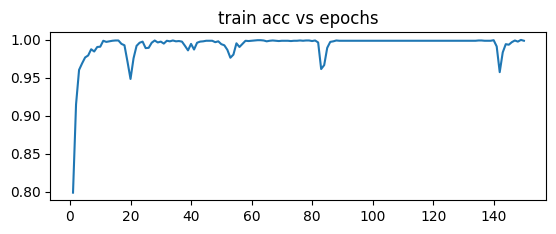

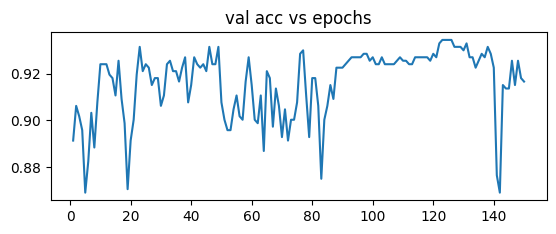

In [36]:
# Access training and validation accuracy for each epoch
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Access other metrics (e.g., loss) if included during compilation
train_loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1,151)
plt.subplot(211)
plt.title("train acc vs epochs")
plt.plot(x, train_acc)
plt.show()
plt.subplot(212)
plt.title("val acc vs epochs")
plt.plot(x, val_acc)
plt.show()

In [37]:
class_names = ["Cloudy", "Snow", "Sunrise", "Fog", "Shine", "Rainy", "Sand"]
predictions = model.predict(test_ds)

predicted_classes = np.argmax(predictions, axis=1)
# Get true class labels from the filenames:
true_classes = np.asarray([os.path.basename(os.path.dirname(filename)) for filename in test_ds.file_paths])

class_name_to_index = {name: i for i, name in enumerate(test_ds.class_names)}
true_classes_numeric = [class_name_to_index[name] for name in true_classes]




from sklearn.metrics import accuracy_score

# Get accuracy for each class individually
for i in range(len(test_ds.class_names)):
    class_idx = i
    class_true_labels = true_classes == class_idx
    class_pred_labels = predicted_classes == class_idx
    class_accuracy = accuracy_score(class_true_labels, class_pred_labels)
    # Use true_classes_numeric for confusion matrix calculation
    cm = confusion_matrix(true_classes_numeric, predicted_classes)
    print(f"Accuracy for class '{test_ds.class_names[class_idx]}': {class_accuracy:.4f}")


27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step
Accuracy for class 'Cloudy': 0.8524
Accuracy for class 'Fog': 0.8762
Accuracy for class 'Rainy': 0.8607
Accuracy for class 'Sand': 0.8429
Accuracy for class 'Shine': 0.8595
Accuracy for class 'Snow': 0.8488
Accuracy for class 'Sunrise': 0.8595


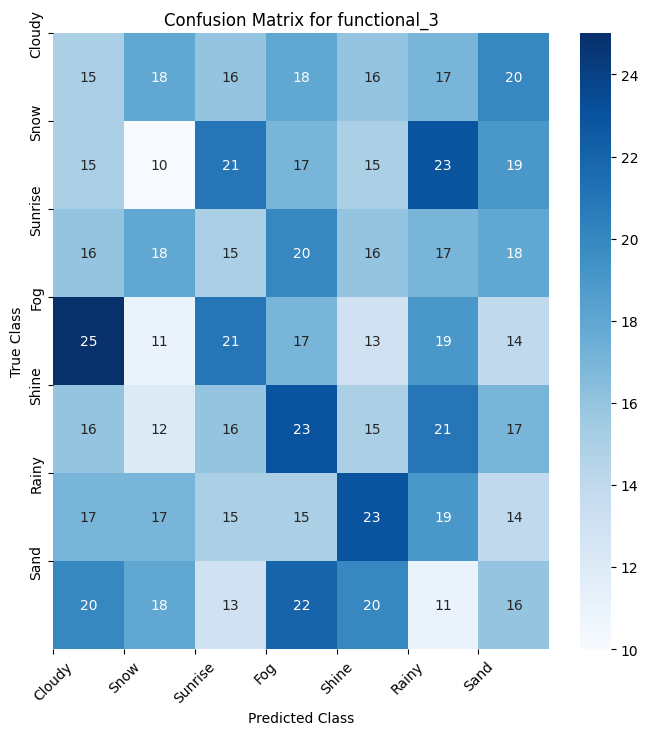

In [38]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')  # Adjust colormap as desired
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45)
plt.yticks(ticks=range(len(class_names)), labels=class_names)
plt.title('Confusion Matrix for ' + model.name)
plt.show()

In [39]:
model.save_weights("/kaggle/working/resnet.weights.h5")

## EVALUATION MODEL SUBSYSTEM

<h3><em>Evaluation:</em></h3>
<h4><em>Transfer learning on three deep CNNs used in the base paper:</em></h4>
<ul>
    <li><p> ResNet-50 CNN</p></li>
    <ol>
        <li> Accuracy: 0.9194097518920898
        <li> Precision:
        <li> Recall:
    </ol>
    <li><p>EfficientNet-b0 CNN</p></li>
        <ol>
        <li> Accuracy: 0.914869487285614
        <li> Precision:
        <li> Recall:
    </ol>
</ul>
<p>The model is
fully trained to do classification task A. The knowledge (pretrained parameters)<br> is
stored and transferred to the new model to do classification task B with fine-tuning.</p>
